<a href="https://colab.research.google.com/github/rehabreda/machine_learning/blob/master/Big_Model_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
cd /content/drive/My\ Drive


/content/drive/My Drive


In [3]:
cd '2019Q3 Challenge'

/content/drive/My Drive/2019Q3 Challenge


In [4]:
cd  'Part 01'/

/content/drive/My Drive/2019Q3 Challenge/Part 01


In [5]:
ls

'Input Dataset.csv'   merge_data_final.csv   ReadMe.docx
 merge_data.csv      'Output Dataset.csv'


#Import Libraries 

In [6]:
### import libraries
import ast
import keras
import numpy as np 
import pandas as pd 
from keras.utils import to_categorical
from keras import regularizers
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC 
from xgboost import XGBClassifier
from sklearn.utils import shuffle
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


#Load Data 


In [0]:
### load data 
inputs=pd.read_csv('Input Dataset.csv',error_bad_lines=False,engine='python')
outputs=pd.read_csv('Output Dataset.csv')

In [8]:
inputs.head()

,node_no,hour,month,day,year,Bandwidth,counter_0,counter_1,counter_2,counter_3,counter_4,counter_5,counter_6,counter_7,counter_8,counter_9,counter_10,counter_11,counter_12,counter_13,counter_14,counter_15,counter_16,counter_17,counter_18,counter_19,counter_20,counter_21,counter_22,counter_23,counter_24,counter_25,counter_26,counter_27,counter_28,counter_29,counter_30,counter_31,counter_32,counter_33,counter_34,counter_35,counter_36,counter_37,counter_38,counter_39,counter_40,counter_41,counter_42,counter_43,counter_44,counter_45,counter_46,counter_47,counter_48,counter_49,counter_50,counter_51
0,0,0,6,12,2019,10,470620,367862,214295,3592,123759,161336,3711,13,2296,5097,22757,429,17050,9153,4963,1012,5145,13051,7140,6991,309057,75335,78895,1145775,4815765,620,260523,694,568,512,211434,256360,489,720,2916,15,446348,342012,483060,502225,"[0.0, 513392.0, 792138.0, 47284.0, 22429.0, 15...","[0.0, 2141075.0, 1297014.0, 78477.0, 32067.0, ...","[1.0, 41.0, 137.0, 102.0, 229.0, 2139.0, 16811...","[17534.0, 11806.0, 44753.0, 30721.0, 28188.0, ...","[0.0, 0.0, 0.0, 1.0, 0.0, 3.0, 3.0, 2.0, 5.0, ...","[2922379.0, 84298.0, 16825.0, 433189.0, 99393....","[29.0, 20.0, 5.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[60.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[107979.0, 0.0, 0.0, 0.0, 0.0, 9.0, 3.0, 3.0, ...","[58.0, 45.0, 123.0, 246.0, 1045.0, 3710.0, 101...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 1.0, 33.0, 408.0, 2735.0, 1124..."
1,0,1,6,12,2019,10,129657,80729,37125,2698,72283,49147,686,17,782,1847,3748,422,8193,3382,2483,530,1133,4949,2047,1315,116997,27616,18965,713044,2038988,299,132990,360,386,299,44554,120356,282,720,1450,11,127771,86418,135699,176369,"[0.0, 1886861.0, 1579023.0, 67836.0, 23810.0, ...","[0.0, 3006891.0, 509578.0, 45896.0, 16714.0, 7...","[0.0, 9.0, 47.0, 45.0, 206.0, 1465.0, 9335.0, ...","[4592.0, 1706.0, 7426.0, 9851.0, 7082.0, 10597...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, ...","[3061149.0, 13178.0, 1251.0, 479755.0, 31696.0...","[51.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[59.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[107979.0, 0.0, 0.0, 0.0, 0.0, 12.0, 0.0, 0.0,...","[48.0, 55.0, 80.0, 153.0, 508.0, 2343.0, 3533....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 1.0, 64.0, 928.0, 3835.0,..."
2,0,2,6,12,2019,10,28839,18523,7949,1,21925,11430,235,0,204,1366,638,0,2218,600,1677,71,629,1791,182,102,62587,1798,3069,557469,500218,223,19458,271,402,280,13569,54494,273,720,917,7,30322,24251,34248,72216,"[0.0, 2024560.0, 1288489.0, 213675.0, 33865.0,...","[0.0, 3214148.0, 315153.0, 38999.0, 12891.0, 6...","[0.0, 9.0, 40.0, 39.0, 95.0, 1026.0, 3168.0, 3...","[2447.0, 133.0, 399.0, 682.0, 1990.0, 7289.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","[3114499.0, 2764.0, 104.0, 467593.0, 12897.0, ...","[59.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[60.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[107976.0, 0.0, 0.0, 0.0, 0.0, 9.0, 0.0, 3.0, ...","[27.0, 19.0, 43.0, 68.0, 117.0, 473.0, 2301.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 42.0, 1212.0, 4..."
3,0,3,6,12,2019,10,17751,17845,5292,0,10683,8994,113,0,142,400,497,1,1215,251,1002,17,99,1455,249,94,45948,2653,3074,523971,205466,206,50349,245,288,261,13016,39056,249,720,790,5,18624,21315,21750,54830,"[0.0, 2089627.0, 1239282.0, 231054.0, 18927.0,...","[0.0, 3337262.0, 219961.0, 27234.0, 6707.0, 25...","[0.0, 4.0, 22.0, 12.0, 27.0, 417.0, 2571.0, 28...","[1174.0, 203.0, 572.0, 626.0, 2758.0, 6243.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[3130794.0, 1283.0, 49.0, 457288.0, 9560.0, 34...","[60.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[60.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[107976.0, 0.0, 0.0, 0.0, 0.0, 12.0, 0.0, 6.0,...","[24.0, 10.0, 24.0, 25.0, 42.0, 136.0, 1194.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 93.0, 785.0, 11..."
4,0,4,6,12,2019,

In [9]:
outputs.head()

,node_no,Bandwidth,year,month,day,Issue_no
0,0,10,2019,6,12,7
1,0,10,2019,6,13,7
2,0,10,2019,6,14,7
3,1,10,2019,6,12,11
4,1,10,2019,6,13,11


#Drop Null Values


In [0]:
inputs.dropna(inplace=True)
inputs.reset_index(drop=True, inplace=True)
outputs.reset_index(drop=True, inplace=True)

In [11]:
len(inputs)

711432

#Number Of Classes  13 


In [12]:
len(set(outputs['Issue_no']))

13

# Merge between inputs and outputs

becuase machine learning model learn relation between inputs and outputs they must be connected in form "Input << Output"

In [0]:
### merge inputs with outputs 
data=inputs.merge(outputs,left_on=['node_no','Bandwidth','year','month','day'],right_on=['node_no','Bandwidth','year','month','day'] ,how='left')

In [14]:
data.head(2)

,node_no,hour,month,day,year,Bandwidth,counter_0,counter_1,counter_2,counter_3,counter_4,counter_5,counter_6,counter_7,counter_8,counter_9,counter_10,counter_11,counter_12,counter_13,counter_14,counter_15,counter_16,counter_17,counter_18,counter_19,counter_20,counter_21,counter_22,counter_23,counter_24,counter_25,counter_26,counter_27,counter_28,counter_29,counter_30,counter_31,counter_32,counter_33,counter_34,counter_35,counter_36,counter_37,counter_38,counter_39,counter_40,counter_41,counter_42,counter_43,counter_44,counter_45,counter_46,counter_47,counter_48,counter_49,counter_50,counter_51,Issue_no
0,0,0,6,12,2019,10,470620,367862,214295,3592,123759,161336,3711,13,2296,5097,22757,429,17050,9153,4963,1012,5145,13051,7140,6991,309057,75335,78895,1145775,4815765,620,260523,694,568,512,211434,256360,489,720,2916,15,446348,342012,483060,502225,"[0.0, 513392.0, 792138.0, 47284.0, 22429.0, 15...","[0.0, 2141075.0, 1297014.0, 78477.0, 32067.0, ...","[1.0, 41.0, 137.0, 102.0, 229.0, 2139.0, 16811...","[17534.0, 11806.0, 44753.0, 30721.0, 28188.0, ...","[0.0, 0.0, 0.0, 1.0, 0.0, 3.0, 3.0, 2.0, 5.0, ...","[2922379.0, 84298.0, 16825.0, 433189.0, 99393....","[29.0, 20.0, 5.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[60.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[107979.0, 0.0, 0.0, 0.0, 0.0, 9.0, 3.0, 3.0, ...","[58.0, 45.0, 123.0, 246.0, 1045.0, 3710.0, 101...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 1.0, 33.0, 408.0, 2735.0, 1124...",7.0
1,0,1,6,12,2019,10,129657,80729,37125,2698,72283,49147,686,17,782,1847,3748,422,8193,3382,2483,530,1133,4949,2047,1315,116997,27616,18965,713044,2038988,299,132990,360,386,299,44554,120356,282,720,1450,11,127771,86418,135699,176369,"[0.0, 1886861.0, 1579023.0, 67836.0, 23810.0, ...","[0.0, 3006891.0, 509578.0, 45896.0, 16714.0, 7...","[0.0, 9.0, 47.0, 45.0, 206.0, 1465.0, 9335.0, ...","[4592.0, 1706.0, 7426.0, 9851.0, 7082.0, 10597...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, ...","[3061149.0, 13178.0, 1251.0, 479755.0, 31696.0...","[51.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[59.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[107979.0, 0.0, 0.0, 0.0, 0.0, 12.0, 0.0, 0.0,...","[48.0, 55.0, 80.0, 153.0, 508.0, 2343.0, 3533....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 1.0, 64.0, 928.0, 3835.0,...",7.0


In [0]:

data = shuffle(data)

In [0]:
data.dropna(inplace=True)

In [17]:
data.columns

Index(['node_no', 'hour', 'month', 'day', 'year', 'Bandwidth', 'counter_0',
       'counter_1', 'counter_2', 'counter_3', 'counter_4', 'counter_5',
       'counter_6', 'counter_7', 'counter_8', 'counter_9', 'counter_10',
       'counter_11', 'counter_12', 'counter_13', 'counter_14', 'counter_15',
       'counter_16', 'counter_17', 'counter_18', 'counter_19', 'counter_20',
       'counter_21', 'counter_22', 'counter_23', 'counter_24', 'counter_25',
       'counter_26', 'counter_27', 'counter_28', 'counter_29', 'counter_30',
       'counter_31', 'counter_32', 'counter_33', 'counter_34', 'counter_35',
       'counter_36', 'counter_37', 'counter_38', 'counter_39', 'counter_40',
       'counter_41', 'counter_42', 'counter_43', 'counter_44', 'counter_45',
       'counter_46', 'counter_47', 'counter_48', 'counter_49', 'counter_50',
       'counter_51', 'Issue_no'],
      dtype='object')

#Data in Counter_40 to Counter_51 is list of numbers need to be converted to average of the list numbers .

In [0]:
### convert data  in Counter_40 to Counter_51 to average 
for i in range(40,52):
    data['counter_{}'.format(i)]=data['counter_{}'.format(i)].apply(lambda s:list(ast.literal_eval(s)))  ## convert string to list 
    data['counter_{}'.format(i)]=data['counter_{}'.format(i)].apply(lambda s :np.mean(s))  ## taKe average of each list

In [19]:
data.head(2)

,node_no,hour,month,day,year,Bandwidth,counter_0,counter_1,counter_2,counter_3,counter_4,counter_5,counter_6,counter_7,counter_8,counter_9,counter_10,counter_11,counter_12,counter_13,counter_14,counter_15,counter_16,counter_17,counter_18,counter_19,counter_20,counter_21,counter_22,counter_23,counter_24,counter_25,counter_26,counter_27,counter_28,counter_29,counter_30,counter_31,counter_32,counter_33,counter_34,counter_35,counter_36,counter_37,counter_38,counter_39,counter_40,counter_41,counter_42,counter_43,counter_44,counter_45,counter_46,counter_47,counter_48,counter_49,counter_50,counter_51,Issue_no
106548,1513,12,6,14,2019,10,525847,281168,121895,975,390198,142755,3387,7,14157,4860,10575,300,31062,1927,1326,106,929,31637,13377,2161,559302,117877,45917,1378217,10540543,2303,397190,1441,883,864,250419,475312,858,720,5217,13,525553,262566,592055,773433,225000.0,225000.0,70151.25,86251.444444,2.518519,180000.00,6.0,6.0,22909.090909,11289.6875,10.444444,36829.000000,4.0
457189,6498,13,6,12,2019,10,888982,1288992,399714,7717,502477,503603,21377,806,40784,32280,29532,424,34228,22134,14638,1663,57180,72743,18147,76612,676640,108315,776377,2105845,5989717,8431,1082146,9218,3234,3075,1096145,499418,2966,720,10824,31,726609,1004231,1338950,1806182,225000.0,225000.0,112819.50,210603.888889,20.629630,179999.95,6.0,6.0,29454.545455,24325.7500,33.925926,85474.761905,4.0


In [0]:
data.to_csv('merge_data_final.csv')

#split whole data to inputs and targets


In [0]:
X=data.iloc[:,:-1]
Y=data.iloc[:,-1]

In [0]:
###transform x,y to numpy array 
X=np.asarray(X)
Y=np.asarray(Y)

In [22]:
X.shape

(402072, 58)

In [23]:
X[0]

array([1.51300000e+03, 1.20000000e+01, 6.00000000e+00, 1.40000000e+01,
       2.01900000e+03, 1.00000000e+01, 5.25847000e+05, 2.81168000e+05,
       1.21895000e+05, 9.75000000e+02, 3.90198000e+05, 1.42755000e+05,
       3.38700000e+03, 7.00000000e+00, 1.41570000e+04, 4.86000000e+03,
       1.05750000e+04, 3.00000000e+02, 3.10620000e+04, 1.92700000e+03,
       1.32600000e+03, 1.06000000e+02, 9.29000000e+02, 3.16370000e+04,
       1.33770000e+04, 2.16100000e+03, 5.59302000e+05, 1.17877000e+05,
       4.59170000e+04, 1.37821700e+06, 1.05405430e+07, 2.30300000e+03,
       3.97190000e+05, 1.44100000e+03, 8.83000000e+02, 8.64000000e+02,
       2.50419000e+05, 4.75312000e+05, 8.58000000e+02, 7.20000000e+02,
       5.21700000e+03, 1.30000000e+01, 5.25553000e+05, 2.62566000e+05,
       5.92055000e+05, 7.73433000e+05, 2.25000000e+05, 2.25000000e+05,
       7.01512500e+04, 8.62514444e+04, 2.51851852e+00, 1.80000000e+05,
       6.00000000e+00, 6.00000000e+00, 2.29090909e+04, 1.12896875e+04,
      

#Feature Selection 

In [24]:
selector=SelectKBest(chi2, k=53)
X_selected=selector.fit_transform(X, Y)
X_selected.shape

(402072, 53)

In [25]:
## feature which selected
cols = selector.get_support(indices=True)

features_names=data.columns[cols]
features_names

Index(['node_no', 'Bandwidth', 'counter_0', 'counter_1', 'counter_2',
       'counter_3', 'counter_4', 'counter_5', 'counter_6', 'counter_7',
       'counter_8', 'counter_9', 'counter_10', 'counter_11', 'counter_12',
       'counter_13', 'counter_14', 'counter_15', 'counter_16', 'counter_17',
       'counter_18', 'counter_19', 'counter_20', 'counter_21', 'counter_22',
       'counter_23', 'counter_24', 'counter_25', 'counter_26', 'counter_27',
       'counter_28', 'counter_29', 'counter_30', 'counter_31', 'counter_32',
       'counter_34', 'counter_35', 'counter_36', 'counter_37', 'counter_38',
       'counter_39', 'counter_40', 'counter_41', 'counter_42', 'counter_43',
       'counter_44', 'counter_45', 'counter_46', 'counter_47', 'counter_48',
       'counter_49', 'counter_50', 'counter_51'],
      dtype='object')

#Normalization
each feature contain diffierent range of number which make learning process hard ,so we normalize each features to be between 0 and 1 .

In [0]:

scaler = MinMaxScaler()
X_scaled=scaler.fit_transform(X_selected)

In [27]:
X_scaled[0]

array([1.50054547e-01, 0.00000000e+00, 6.44795597e-03, 2.71507644e-03,
       1.84603246e-02, 7.45547362e-04, 4.05286197e-02, 2.16108684e-02,
       1.98670136e-03, 6.95299774e-05, 1.00079388e-02, 1.32798532e-03,
       1.61873973e-02, 2.36481160e-03, 3.73438745e-02, 9.39926181e-04,
       8.40470359e-04, 1.62135043e-04, 3.98084054e-04, 2.10965231e-02,
       2.48373052e-02, 5.39358575e-04, 3.15739700e-02, 2.03985467e-02,
       2.59110704e-03, 3.82838056e-01, 2.74434426e-02, 8.42660656e-03,
       2.64293904e-03, 2.10718725e-02, 3.04830686e-03, 1.43887288e-02,
       1.32962377e-02, 3.11771630e-02, 1.44092703e-02, 2.18394173e-02,
       3.16301703e-02, 1.45986944e-01, 7.29350000e-02, 4.33774216e-02,
       2.86112971e-02, 9.99722022e-01, 9.99722022e-01, 3.54642646e-02,
       2.81178160e-02, 7.83952041e-03, 9.99722299e-01, 8.00000000e-01,
       8.00000000e-01, 3.33333333e-01, 2.65037447e-02, 1.69247389e-02,
       2.94088077e-02])

# split X,Y to training data and test data 

In [0]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

In [29]:
len(X_train)

321657

#machine learning model 

In [30]:
## try  LogisticRegression model 
log=LogisticRegression().fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [31]:
## get accuracy 
log_pred=log.predict(X_test)
log_acc=accuracy_score(y_test,log_pred)
print('Accuracy Of LogisticRegression is : {}'.format(log_acc))

Accuracy Of LogisticRegression is : 0.43529192314866627


In [0]:
##try   KNeighborsClassifier classifier
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train) 
knn_pred=knn.predict(X_test)
knn_acc=accuracy_score(y_test,knn_pred)


In [33]:
print('Accuracy f  KNeighborsClassifier is : {}'.format(knn_acc))

Accuracy f  KNeighborsClassifier is : 0.6741155257103775


In [0]:
## try RandomForestClassifier model 
clf = RandomForestClassifier(n_estimators=500, max_depth=100,
                             n_jobs = -1 ) ## define classifier 

In [35]:
clf.fit(X_train,y_train)  ## fit classifier on training data

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=100, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [0]:
## get predictions 
predictions=clf.predict(X_test)

In [37]:
## get accuracy
acc=accuracy_score(y_test,predictions)
print('Accuracy Of RandomForestClassifier  is : {}'.format(acc))

Accuracy Of RandomForestClassifier  is : 0.6451159609525586


#Because we have imblance data we should use any metrics other than accuaracy 

In [0]:
### confusin matrix

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, predictions)


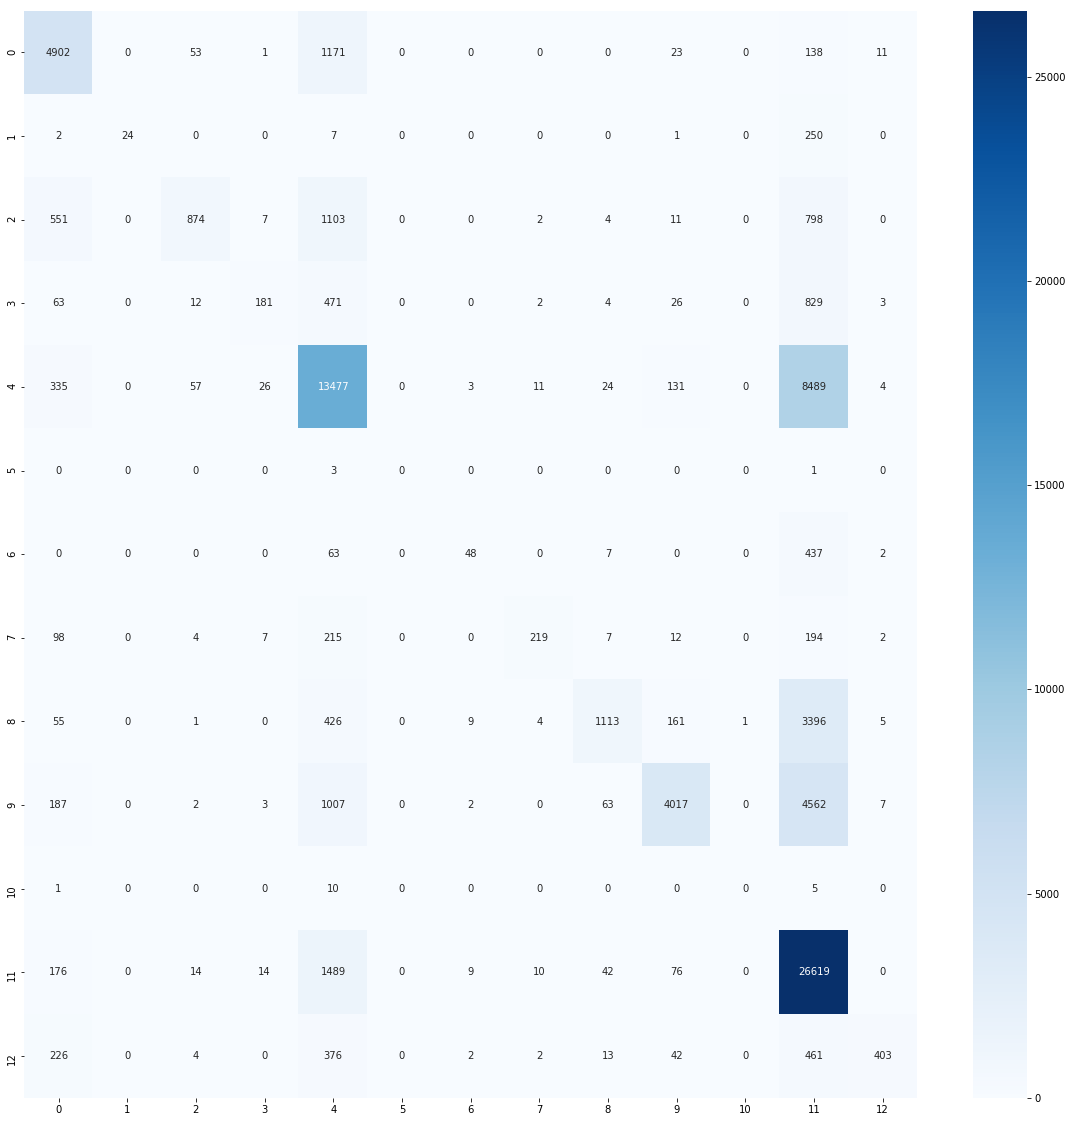

In [39]:
### plot confusin matrix
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (20,20))
sn.heatmap(cm, annot=True,fmt='d',cmap='Blues')

In [40]:
### try XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [41]:
## get accuracy
xgb_predictions=xgb.predict(X_test)
acc=accuracy_score(y_test,xgb_predictions)
print('Accuracy Of XGBClassifier  is : {}'.format(acc))

Accuracy Of XGBClassifier  is : 0.5016103960703848


# deep learning model 

In [42]:
## build model 
model=keras.models.Sequential()
model.add(keras.layers.Dense(units=128,activation='relu',input_shape=(53,)))
model.add(keras.layers.Dropout(.2))
model.add(keras.layers.Dense(units=128,activation='relu'))
model.add(keras.layers.Dropout(.2))
model.add(keras.layers.Dense(units=128,activation='relu'))
model.add(keras.layers.Dropout(.2))
model.add(keras.layers.Dense(units=256,activation='relu'))
model.add(keras.layers.Dropout(.2))
model.add(keras.layers.Dense(units=256,activation='relu'))
model.add(keras.layers.Dropout(.2))
model.add(keras.layers.Dense(units=256,activation='relu'))
model.add(keras.layers.Dropout(.2))
model.add(keras.layers.Dense(units=512,activation='relu'))
model.add(keras.layers.Dropout(.2))
model.add(keras.layers.Dense(units=512,activation='relu'))
model.add(keras.layers.Dropout(.2))
model.add(keras.layers.Dense(units=13,activation='softmax'))







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [43]:
### compile model 
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['categorical_accuracy'])

In [0]:
### make target to one hot vector
y_train_cat=to_categorical(y_train,num_classes=13)
y_test_cat=to_categorical(y_test,num_classes=13)


In [45]:
## fit model 
model.fit(X_train,y_train_cat,epochs=10,batch_size=64,shuffle=True)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/10





321657/321657 [==============================] - 43s 135us/step - loss: 1.5850 - categorical_accuracy: 0.4279
Epoch 2/10
321657/321657 [==============================] - 38s 118us/step - loss: 1.5764 - categorical_accuracy: 0.4310
Epoch 3/10
321657/321657 [==============================] - 38s 118us/step - loss: 1.5773 - categorical_accuracy: 0.4315
Epoch 4/10
321657/321657 [==============================] - 38s 118us/step - loss: 1.5774 - categorical_accuracy: 0.4320
Epoch 5/10
321657/321657 [==============================] - 38s 120us/step - loss: 1.5782 - categorical_accuracy: 0.4317
Epoch 6/10
321657/321657 [==============================] - 38s 117us/step - loss: 1.5828 - categorical_accuracy: 0.4317
Epoch 7/10
321657/321657 [==============================] - 38s 117us/step - loss: 1.5879 - categorical_accuracy: 0.4316
Epoch 8/10
321657/321657 [=========================

In [46]:
## evaluate model on test data 
model.evaluate(X_test,y_test_cat)


80415/80415 [==============================] - 4s 53us/step


[1.5712977856180823, 0.4340359385649689]

In [47]:
np.argmax(model.predict([X_test[0].reshape(-1,53)]))

11

In [48]:
np.argmax(y_test_cat[0])

11